Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/CombinedSalesData 2009-2011.xlsx'
try:

    df = pd.read_excel(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


In [ ]:
df.to_csv('CombinedSales 2009-2011.csv')

In [ ]:
# first 5 rows in the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month
0,564754,21068,VINTAGE BILLBOARD LOVE/HATE MUG,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
1,564754,21221,SET/4 BADGES CUTE CREATURES,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
2,564754,21232,STRAWBERRY CERAMIC TRINKET BOX,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
3,564754,21379,CAMPHOR WOOD PORTOBELLO MUSHROOM,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
4,564754,21774,DECORATIVE CATS BATHROOM BOTTLE,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August


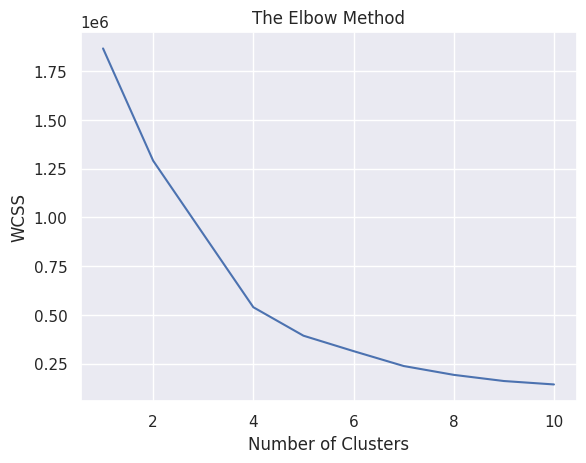

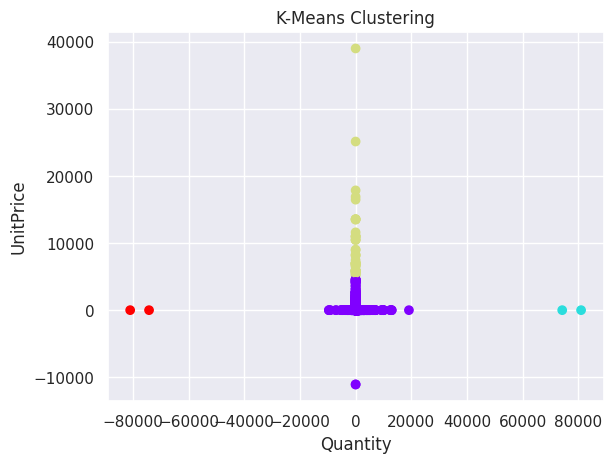

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Selecting relevant features for clustering
x = df[['Quantity', 'UnitPrice']].copy()

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method result
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans with optimal number of clusters (assume 3 based on the elbow method)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(x_scaled)
df['Cluster'] = kmeans.predict(x_scaled)

# Plot the clusters
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'], cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


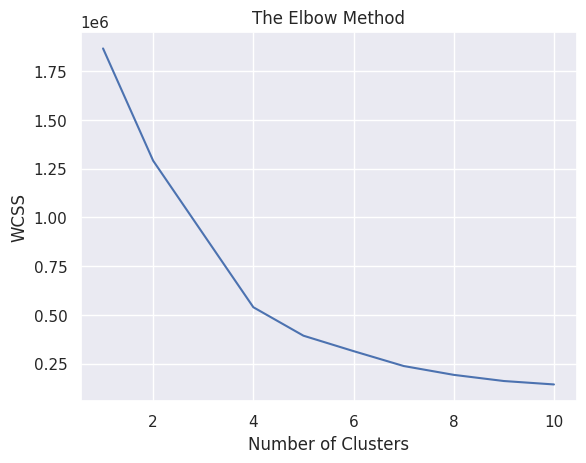

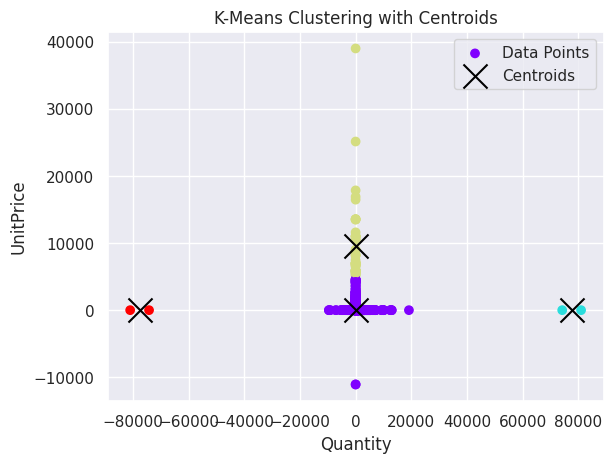

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
x = df[['Quantity', 'UnitPrice']].copy()

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method result
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans with optimal number of clusters (assume 4 based on the elbow method)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(x_scaled)
df['Cluster'] = kmeans.predict(x_scaled)

# Get centroids
centroids = kmeans.cluster_centers_

# Inverse transform the centroids back to the original scale
centroids_original = scaler.inverse_transform(centroids)

# Plot the clusters and centroids
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'], cmap='rainbow', label='Data Points')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='black', marker='x', label='Centroids')  # Centroids in black with 'x' marker
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()


In [ ]:
# finding the number of rows and columns
df.shape

(932922, 12)

In [ ]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932922 entries, 0 to 932921
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        932922 non-null  object        
 1   StockCode        932922 non-null  object        
 2   Description      931468 non-null  object        
 3   Quantity         932922 non-null  int64         
 4   InvoiceDateTime  932922 non-null  datetime64[ns]
 5   UnitPrice        932922 non-null  float64       
 6   Customer ID      797885 non-null  float64       
 7   Country          932922 non-null  object        
 8   InvoiceDate      932922 non-null  datetime64[ns]
 9   InvoiceTime      932922 non-null  object        
 10  Year             932922 non-null  int64         
 11  Month            932922 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 85.4+ MB


In [ ]:
# checking for missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDateTime,0
UnitPrice,0
Customer ID,135037
Country,0
InvoiceDate,0
InvoiceTime,0


In [ ]:
df2 = df.dropna()

# Verify that rows with empty values are removed
print("Shape of the original data:", df.shape)
print("Shape of the cleaned data:", df2.shape)

Shape of the original data: (932922, 12)
Shape of the cleaned data: (797885, 12)


In [ ]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month
74745,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,2011-08-30,10:49:00,2011,August
74746,565383,22896,PEG BAG APPLES DESIGN,1,2011-09-02 15:45:00,4.96,14096.0,United Kingdom,2011-09-02,15:45:00,2011,September
74747,565383,22939,ADULT APRON APPLE DELIGHT,1,2011-09-02 15:45:00,10.79,14096.0,United Kingdom,2011-09-02,15:45:00,2011,September
74748,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom,2011-09-02,15:45:00,2011,September
74749,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,2011-09-09,15:17:00,2011,September


Choosing the Annual Income Column & Spending Score column

In [ ]:
X = df2.iloc[:,[5,6]].values

In [ ]:
print(X)

[[1.1170e+01 1.4096e+04]
 [4.9600e+00 1.4096e+04]
 [1.0790e+01 1.4096e+04]
 ...
 [1.2500e+00 1.4911e+04]
 [1.2500e+00 1.4911e+04]
 [1.2500e+00 1.4911e+04]]


Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

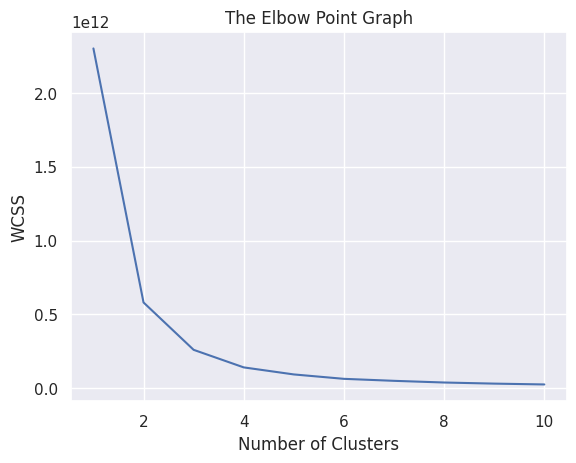

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 3

we can observe that the optimal number of clusters for this data set turns out to be 3 as these seems a sharp dip in the graph at the cluster of 3 with the help of elbow point graph that helps in the determination of the optium number of clusters in a dataset.


Training the k-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 2 2 2]


Visualizing all the Clusters

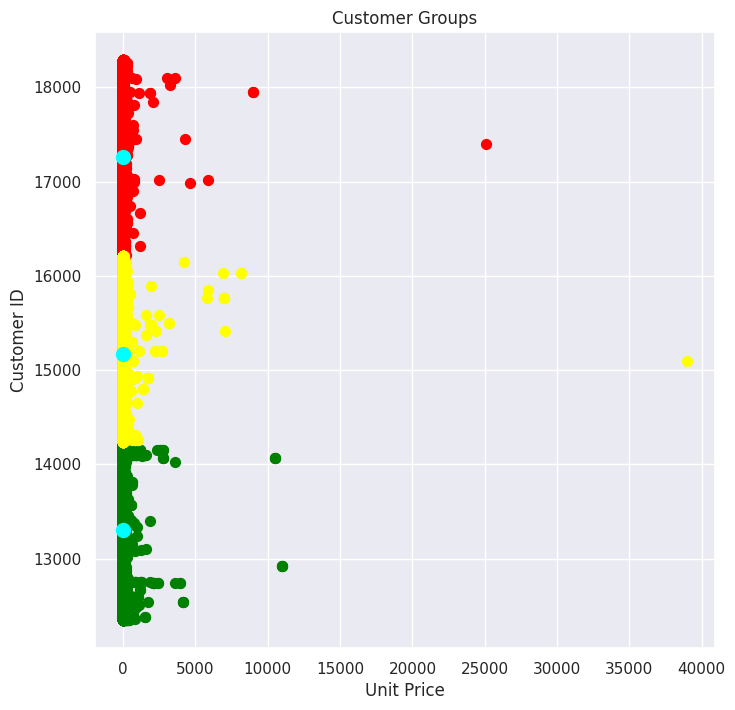

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Unit Price')
plt.ylabel('Customer ID')
plt.show()

In [ ]:
Z = df2.iloc[:,[3,6]].values

In [ ]:
print(Z)

[[1.0000e+00 1.4096e+04]
 [1.0000e+00 1.4096e+04]
 [1.0000e+00 1.4096e+04]
 ...
 [1.2000e+01 1.4911e+04]
 [1.2000e+01 1.4911e+04]
 [1.2000e+01 1.4911e+04]]


In [ ]:
# finding wcss value for different number of clusters

wcss2 = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(Z)

  wcss2.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

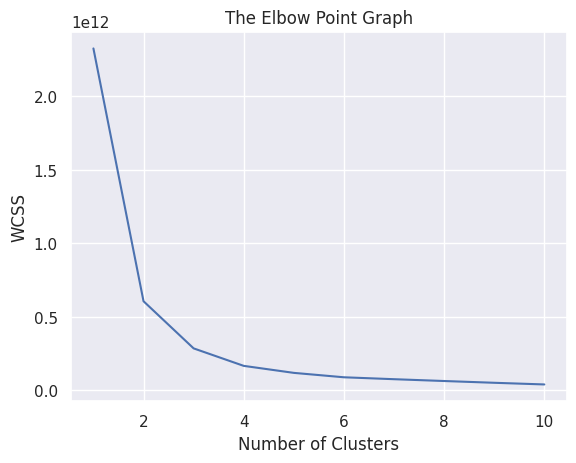

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss2)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
W = kmeans.fit_predict(Z)

print(W)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 1 1 1]


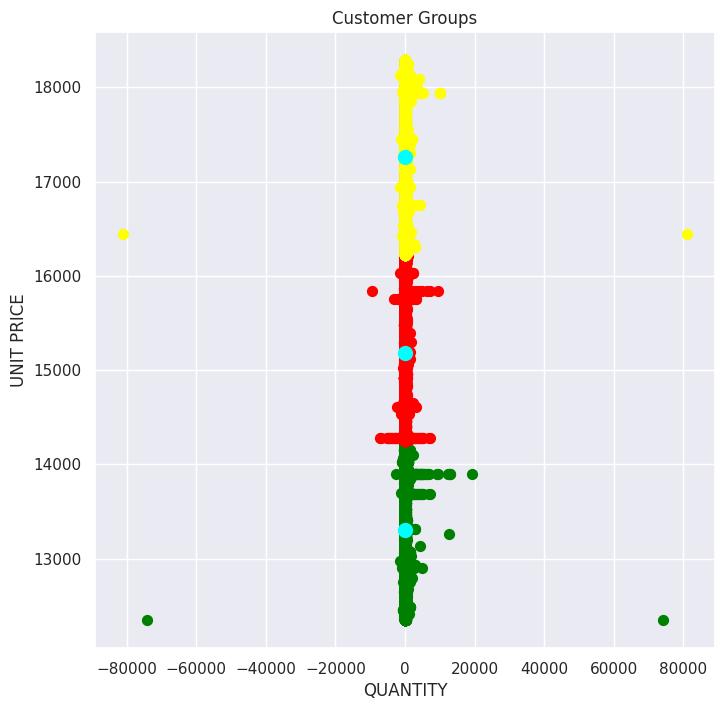

In [ ]:
from itertools import zip_longest
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(Z[W==0,0], Z[W==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(Z[W==1,0], Z[W==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(Z[W==2,0], Z[W==2,1], s=50, c='yellow', label='Cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('QUANTITY')
plt.ylabel('UNIT PRICE')
plt.show()